In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_metric(path):
    d = pd.read_csv(path)
    d = d[(d["Type"] == "SNP") & (d["Filter"] == "PASS")]
    d = d[[("HG00" not in s) or ("HG001" in s) for s in d["Subset"]]]
    d = d[d["TRUTH.TOTAL"] >= 1000]
    d.index = d["Subset"]
    return d

path1 = "../../3_NanoStrandSeq_PseudoBulk/results/stratification/nanocaller/PacBio.full/benchmark.extended.csv"
path2 = "../../3_NanoStrandSeq_PseudoBulk/results/stratification/nanocaller/Ultralong.full/benchmark.extended.csv"
path3 = "../../3_NanoStrandSeq_PseudoBulk/results/stratification/nanocaller/NSS.full/benchmark.extended.csv"
d1 = load_metric(path1)
d2 = load_metric(path2)
d3 = load_metric(path3)
len(d1), len(d2), len(d3)

(76, 76, 76)

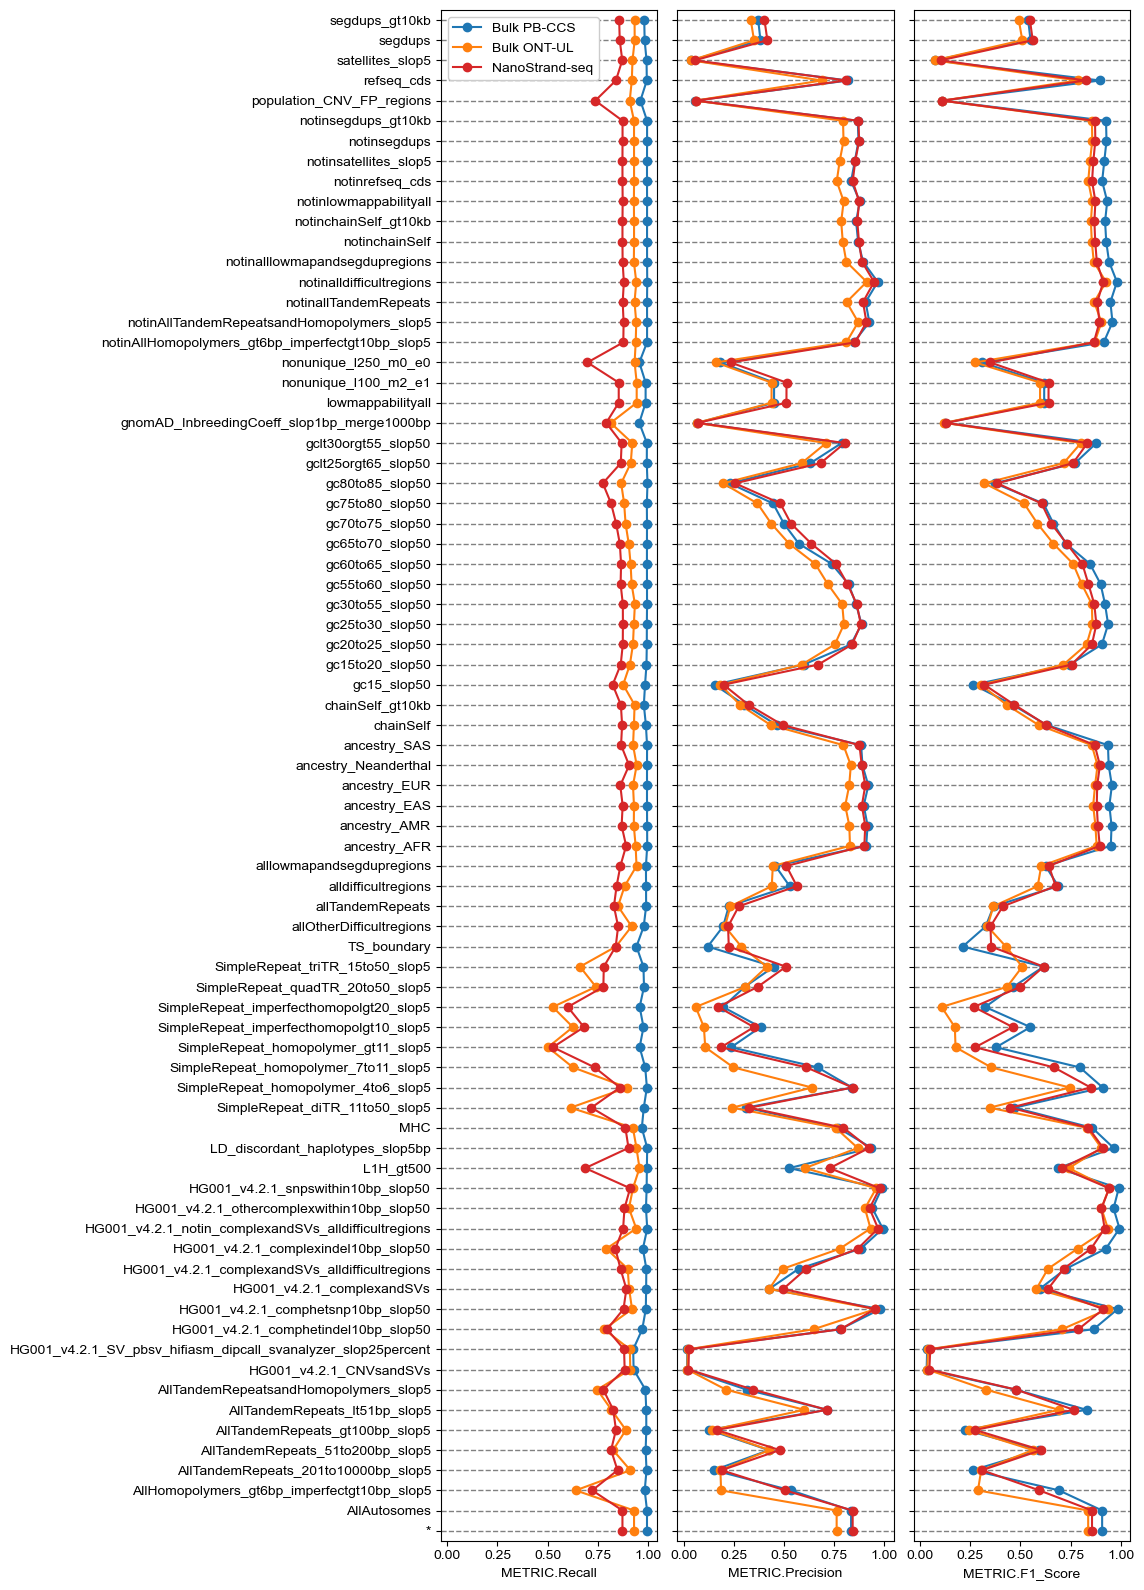

In [3]:
labels = ["Bulk PB-CCS", "Bulk ONT-UL", "NanoStrand-seq"]
colors = ["C0", "C1", "C3"]
fig, axs = plt.subplots(1, 3, figsize=(11.5, 16), sharex=True, sharey=True)
for i in range(3):
    plt.sca(axs[i])
    if i == 0:
        s = "METRIC.Recall"
    elif i == 1:
        s = "METRIC.Precision"
    else:
        s = "METRIC.F1_Score"
    xs1 = d1[s]
    xs2 = d2[s]
    xs3 = d3[s]
    ys = np.arange(len(xs1))
    for j, xs in enumerate([xs1, xs2, xs3]):
        label = None
        if i == 0:
            label = labels[j]
        plt.plot(xs, ys, color=colors[j], marker="o", label=label)
    if i == 0:
        plt.yticks(ys, d1["Subset"])
    plt.xlabel(s)
    plt.grid(axis="y", lw=1, ls="--", color="grey")
    if i == 0:
        plt.legend(framealpha=1)
plt.ylim(min(ys) - 0.5, max(ys) + 0.5)
plt.tight_layout()
plt.savefig("figures/benchmark_genome_stratification.pdf", dpi=300)